<a href="https://www.kaggle.com/code/feezakhankhanzada/financial-analysis-of-individual-shares?scriptVersionId=104460918" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jpx-tokyo-stock-exchange-prediction/stock_list.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/options.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/financials.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/secondary_stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/trades.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/__init__.py
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/stock_fin_spec.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/trades_spec.csv
/kaggle/input/jpx-tokyo-stock-

List of all the stocks in the Market

In [2]:
stockList = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/stock_list.csv')

In [3]:
stockList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SecuritiesCode          4417 non-null   int64  
 1   EffectiveDate           4417 non-null   int64  
 2   Name                    4417 non-null   object 
 3   Section/Products        4417 non-null   object 
 4   NewMarketSegment        3772 non-null   object 
 5   33SectorCode            4417 non-null   object 
 6   33SectorName            4417 non-null   object 
 7   17SectorCode            4417 non-null   object 
 8   17SectorName            4417 non-null   object 
 9   NewIndexSeriesSizeCode  4417 non-null   object 
 10  NewIndexSeriesSize      4417 non-null   object 
 11  TradeDate               4121 non-null   float64
 12  Close                   4121 non-null   float64
 13  IssuedShares            4121 non-null   float64
 14  MarketCapitalization    4121 non-null   

In [4]:
len(stockList.SecuritiesCode.unique())

4417

There are total 4417 companies holding shares in the market

Specifications Folder:

In [5]:
dataSpecificationStockList = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/stock_list_spec.csv')

In [6]:
dataSpecificationStockList

,Column,Sample value,Type,Addendum,Remarks
0,SecuritiesCode,1301,Int64,NaN,Local Securities Code
1,EffectiveDate,20211230,date,NaN,the effective date
2,Name,"KYOKUYO CO.,LTD.",string,NaN,Name of security
3,Section/Products,First Section (Domestic),string,NaN,Section/Product
4,NewMarketSegment,Prime Market,string,NaN,New market segment effective from 2022-04-04 (...
5,33SectorCode,50,Int64,NaN,33 Sector Name\n\nref. https://www.jpx.co.jp/e...
6,33SectorName,"Fishery, Agriculture and Forestry",string,NaN,33 Sector Name\n\nref. https://www.jpx.co.jp/e...
7,17SectorCode,1,Int64,NaN,17 Sector Code\nref. https://www.jpx.co.jp/eng...
8,17SectorName,FOODS,string,NaN,17 Sector Name\nref. https://www.jpx.co.jp/eng...
9,NewIndexSeriesSizeCode,7,Int64,NaN,TOPIX New Index Series code\n\nref. https://ww...


Train Folder

In [7]:
trainStockPrices = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv')

In [8]:
trainStockPrices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [9]:
len(trainStockPrices.SecuritiesCode.unique())

2000

There are total 2000 companies data in the traning datasets

In [10]:
testStockPrices = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv')

In [11]:
len(testStockPrices.SecuritiesCode.unique())

2000

There are total 2000 companies data in the testing datasets

In [12]:
import plotly.express as px

In [13]:
stockList['Section/Products'].nunique()

11

In [14]:
trainStockPrices = trainStockPrices.merge(stockList , on = 'SecuritiesCode')

In [15]:
from datetime import datetime
trainStockPrices['EffectiveDate'] = pd.to_datetime(trainStockPrices['EffectiveDate']).dt.date
trainStockPrices['Date'] = pd.to_datetime(trainStockPrices['Date']).dt.date
trainStockPrices['TradeDate'] = pd.to_datetime(trainStockPrices['TradeDate']).dt.date

In [16]:
stockList.isna().sum()

SecuritiesCode              0
EffectiveDate               0
Name                        0
Section/Products            0
NewMarketSegment          645
33SectorCode                0
33SectorName                0
17SectorCode                0
17SectorName                0
NewIndexSeriesSizeCode      0
NewIndexSeriesSize          0
TradeDate                 296
Close                     296
IssuedShares              296
MarketCapitalization      296
Universe0                   0
dtype: int64

In [17]:
dateAnalysis = trainStockPrices.groupby(['Date','EffectiveDate','TradeDate','SecuritiesCode','Name']).agg({'SecuritiesCode' : 'count'}).rename(columns = {'SecuritiesCode' : 'count'}).reset_index()

In [18]:
dateAnalysis

,Date,EffectiveDate,TradeDate,SecuritiesCode,Name,count
0,2017-01-04,1970-01-01,1970-01-01,1301,"KYOKUYO CO.,LTD.",1
1,2017-01-04,1970-01-01,1970-01-01,1332,"Nippon Suisan Kaisha,Ltd.",1
2,2017-01-04,1970-01-01,1970-01-01,1333,Maruha Nichiro Corporation,1
3,2017-01-04,1970-01-01,1970-01-01,1376,"KANEKO SEEDS CO.,LTD.",1
4,2017-01-04,1970-01-01,1970-01-01,1377,SAKATA SEED CORPORATION,1
...,...,...,...,...,...,...
2332526,2021-12-03,1970-01-01,1970-01-01,9990,SAC'S BAR HOLDINGS INC.,1
2332527,2021-12-03,1970-01-01,1970-01-01,9991,GECOSS CORPORATION,1
2332528,2021-12-03,1970-01-01,1970-01-01,9993,"YAMAZAWA CO.,LTD.",1
2332529,2021-12-03,1970-01-01,1970-01-01,9994,YAMAYA CORPORATION,1


In [19]:
dateAnalysis.loc[dateAnalysis['EffectiveDate'] != dateAnalysis['TradeDate']]

,Date,EffectiveDate,TradeDate,SecuritiesCode,Name,count


In [20]:
trainStockPrices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332531 entries, 0 to 2332530
Data columns (total 27 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   RowId                   object 
 1   Date                    object 
 2   SecuritiesCode          int64  
 3   Open                    float64
 4   High                    float64
 5   Low                     float64
 6   Close_x                 float64
 7   Volume                  int64  
 8   AdjustmentFactor        float64
 9   ExpectedDividend        float64
 10  SupervisionFlag         bool   
 11  Target                  float64
 12  EffectiveDate           object 
 13  Name                    object 
 14  Section/Products        object 
 15  NewMarketSegment        object 
 16  33SectorCode            object 
 17  33SectorName            object 
 18  17SectorCode            object 
 19  17SectorName            object 
 20  NewIndexSeriesSizeCode  object 
 21  NewIndexSeriesSize      object 

In [21]:
trainStockPrices[['Date' , 'SecuritiesCode' , 'Name' , 'Open' , 'High' , 'Low' , 'Close_x' , 'Volume' , 'Target']]

,Date,SecuritiesCode,Name,Open,High,Low,Close_x,Volume,Target
0,2017-01-04,1301,"KYOKUYO CO.,LTD.",2734.0,2755.0,2730.0,2742.0,31400,0.000730
1,2017-01-05,1301,"KYOKUYO CO.,LTD.",2743.0,2747.0,2735.0,2738.0,17900,0.002920
2,2017-01-06,1301,"KYOKUYO CO.,LTD.",2734.0,2744.0,2720.0,2740.0,19900,-0.001092
3,2017-01-10,1301,"KYOKUYO CO.,LTD.",2745.0,2754.0,2735.0,2748.0,24200,-0.005100
4,2017-01-11,1301,"KYOKUYO CO.,LTD.",2748.0,2752.0,2737.0,2745.0,9300,-0.003295
...,...,...,...,...,...,...,...,...,...
2332526,2021-11-29,4169,ENECHANGE Ltd.,6970.0,7350.0,6970.0,6970.0,772500,0.009972
2332527,2021-11-30,4169,ENECHANGE Ltd.,6770.0,7240.0,6410.0,7020.0,887400,0.060649
2332528,2021-12-01,4169,ENECHANGE Ltd.,7190.0,7380.0,6670.0,7090.0,496800,-0.039894
2332529,2021-12-02,4169,ENECHANGE Ltd.,7160.0,7870.0,7110.0,7520.0,783000,-0.127424


filling the missing values with 0

In [22]:
trainStockPrices.loc[trainStockPrices['Open'].isna()==True , 'Open'] = 0
trainStockPrices.loc[trainStockPrices['High'].isna()==True , 'High'] = 0
trainStockPrices.loc[trainStockPrices['Low'].isna()==True , 'Low'] = 0
trainStockPrices.loc[trainStockPrices['Close_x'].isna()==True , 'Close_x'] = 0
trainStockPrices.loc[trainStockPrices['Volume'].isna()==True , 'Volume'] = 0
trainStockPrices.loc[trainStockPrices['Target'].isna()==True , 'Target'] = 0 

In [23]:
trainStockPrices[['Date' , 'SecuritiesCode' , 'Name' , 'Open' , 'High' , 'Low' , 'Close_x' , 'Volume' , 'Target']].isna().sum()

Date              0
SecuritiesCode    0
Name              0
Open              0
High              0
Low               0
Close_x           0
Volume            0
Target            0
dtype: int64

In [24]:
tradeAnalysis = trainStockPrices[['Date' , 'SecuritiesCode' , 'Name' , 'Open' , 'High' , 'Low' , 'Close_x' , 'Volume' , 'Target']]

In [25]:
tradeAnalysis['Year'] = pd.to_datetime(tradeAnalysis['Date']).dt.year
tradeAnalysis['Month'] = pd.to_datetime(tradeAnalysis['Date']).dt.month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
tradeAnalysis

,Date,SecuritiesCode,Name,Open,High,Low,Close_x,Volume,Target,Year,Month
0,2017-01-04,1301,"KYOKUYO CO.,LTD.",2734.0,2755.0,2730.0,2742.0,31400,0.000730,2017,1
1,2017-01-05,1301,"KYOKUYO CO.,LTD.",2743.0,2747.0,2735.0,2738.0,17900,0.002920,2017,1
2,2017-01-06,1301,"KYOKUYO CO.,LTD.",2734.0,2744.0,2720.0,2740.0,19900,-0.001092,2017,1
3,2017-01-10,1301,"KYOKUYO CO.,LTD.",2745.0,2754.0,2735.0,2748.0,24200,-0.005100,2017,1
4,2017-01-11,1301,"KYOKUYO CO.,LTD.",2748.0,2752.0,2737.0,2745.0,9300,-0.003295,2017,1
...,...,...,...,...,...,...,...,...,...,...,...
2332526,2021-11-29,4169,ENECHANGE Ltd.,6970.0,7350.0,6970.0,6970.0,772500,0.009972,2021,11
2332527,2021-11-30,4169,ENECHANGE Ltd.,6770.0,7240.0,6410.0,7020.0,887400,0.060649,2021,11
2332528,2021-12-01,4169,ENECHANGE Ltd.,7190.0,7380.0,6670.0,7090.0,496800,-0.039894,2021,12
2332529,2021-12-02,4169,ENECHANGE Ltd.,7160.0,7870.0,7110.0,7520.0,783000,-0.127424,2021,12


CandleStick Analysis of company with security ID 4169

In [27]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=tradeAnalysis.loc[tradeAnalysis['SecuritiesCode'] == 4169 , 'Date'],
                open=tradeAnalysis.loc[tradeAnalysis['SecuritiesCode'] == 4169 , 'Open'],
                high=tradeAnalysis.loc[tradeAnalysis['SecuritiesCode'] == 4169 , 'High'],
                low=tradeAnalysis.loc[tradeAnalysis['SecuritiesCode'] == 4169 , 'Low'],
                close=tradeAnalysis.loc[tradeAnalysis['SecuritiesCode'] == 4169 , 'Close_x'])])

fig.show()

In [28]:
tradeAnalysis.loc[tradeAnalysis['SecuritiesCode'] == 4169]

,Date,SecuritiesCode,Name,Open,High,Low,Close_x,Volume,Target,Year,Month
2332299,2020-12-23,4169,ENECHANGE Ltd.,0.0,0.0,0.0,0.0,0,0.187621,2020,12
2332300,2020-12-24,4169,ENECHANGE Ltd.,2400.0,2700.0,2125.0,2682.0,1767400,0.219766,2020,12
2332301,2020-12-25,4169,ENECHANGE Ltd.,2532.0,3185.0,2463.0,3185.0,1007000,0.044991,2020,12
2332302,2020-12-28,4169,ENECHANGE Ltd.,3800.0,3885.0,3745.0,3885.0,211400,0.206897,2020,12
2332303,2020-12-29,4169,ENECHANGE Ltd.,4165.0,4585.0,3685.0,4060.0,3378100,0.142857,2020,12
...,...,...,...,...,...,...,...,...,...,...,...
2332526,2021-11-29,4169,ENECHANGE Ltd.,6970.0,7350.0,6970.0,6970.0,772500,0.009972,2021,11
2332527,2021-11-30,4169,ENECHANGE Ltd.,6770.0,7240.0,6410.0,7020.0,887400,0.060649,2021,11
2332528,2021-12-01,4169,ENECHANGE Ltd.,7190.0,7380.0,6670.0,7090.0,496800,-0.039894,2021,12
2332529,2021-12-02,4169,ENECHANGE Ltd.,7160.0,7870.0,7110.0,7520.0,783000,-0.127424,2021,12


In [29]:
trainTrade = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/trades.csv')

In [30]:
trainTrade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 1712 non-null   object 
 1   StartDate                            765 non-null    object 
 2   EndDate                              765 non-null    object 
 3   Section                              765 non-null    object 
 4   TotalSales                           765 non-null    float64
 5   TotalPurchases                       765 non-null    float64
 6   TotalTotal                           765 non-null    float64
 7   TotalBalance                         765 non-null    float64
 8   ProprietarySales                     765 non-null    float64
 9   ProprietaryPurchases                 765 non-null    float64
 10  ProprietaryTotal                     765 non-null    float64
 11  ProprietaryBalance            

In [31]:
trainFinancial = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/financials.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning:

Columns (14,15,16,17,18,19,42,44) have mixed types.Specify dtype option on import or set low_memory=False.



In [32]:
trainFinancial['DisclosedDate'] = pd.to_datetime(trainFinancial['DisclosedDate']).dt.date
trainFinancial['Date'] = pd.to_datetime(trainFinancial['Date']).dt.date

In [33]:
trainFinancial['Year'] = pd.to_datetime(trainFinancial['Date']).dt.year
trainFinancial['Month'] = pd.to_datetime(trainFinancial['Date']).dt.month
trainFinancial['ClosingYear'] = pd.to_datetime(trainFinancial['DisclosedDate']).dt.year
trainFinancial['ClosingMonth'] = pd.to_datetime(trainFinancial['DisclosedDate']).dt.month

In [34]:
trainFinancial.groupby(['SecuritiesCode' , 'Date' , 'DisclosedDate' , 'TypeOfCurrentPeriod'])['Date'].count()

SecuritiesCode  Date        DisclosedDate  TypeOfCurrentPeriod
1301.0          2017-02-10  2017-02-10     3Q                     1
                2017-02-17  2017-02-17     FY                     1
                2017-05-11  2017-05-11     FY                     1
                2017-08-04  2017-08-04     1Q                     1
                2017-11-06  2017-11-06     2Q                     1
                                                                 ..
9997.0          2021-01-28  2021-01-28     FY                     1
                2021-01-29  2021-01-29     3Q                     1
                2021-05-13  2021-05-13     FY                     1
                2021-07-30  2021-07-30     1Q                     1
                2021-10-29  2021-10-29     2Q                     1
Name: Date, Length: 91294, dtype: int64

In [35]:
trainFinancial.isna().sum()

DisclosureNumber                                                                    2
DateCode                                                                            2
Date                                                                                0
SecuritiesCode                                                                      2
DisclosedDate                                                                       2
DisclosedTime                                                                       2
DisclosedUnixTime                                                                   2
TypeOfDocument                                                                      2
CurrentPeriodEndDate                                                                2
TypeOfCurrentPeriod                                                                 2
CurrentFiscalYearStartDate                                                          2
CurrentFiscalYearEndDate                              

In [36]:
trainFinancial.groupby(['Year' , 'ClosingYear' , 'SecuritiesCode' , 'TypeOfCurrentPeriod' , 'TypeOfDocument' , 'TotalAssets' , 'Equity' , 'EquityToAssetRatio'])['Year'].count()

Year  ClosingYear  SecuritiesCode  TypeOfCurrentPeriod  TypeOfDocument                         TotalAssets   Equity        EquityToAssetRatio
2017  2017.0       1301.0          1Q                   1QFinancialStatements_Consolidated_JP  1.074220e+11  2.556000e+10  0.234                 1
                                   2Q                   2QFinancialStatements_Consolidated_JP  1.198060e+11  2.669200e+10  0.22                  1
                                   3Q                   3QFinancialStatements_Consolidated_JP  1.171680e+11  2.577900e+10  0.217                 1
                                   FY                   FYFinancialStatements_Consolidated_JP  9.739100e+10  2.539100e+10  0.256                 1
                   1332.0          1Q                   1QFinancialStatements_Consolidated_JP  4.644360e+11  1.434490e+11  0.269                 1
                                                                                                                           

In [37]:
trainFinancial.TypeOfDocument.unique()

array(['3QFinancialStatements_Consolidated_JP', 'ForecastRevision',
       'ForecastRevision_REIT',
       '3QFinancialStatements_NonConsolidated_JP',
       '2QFinancialStatements_Consolidated_JP',
       '1QFinancialStatements_NonConsolidated_JP',
       '2QFinancialStatements_NonConsolidated_JP',
       '1QFinancialStatements_Consolidated_JP',
       'FYFinancialStatements_Consolidated_JP',
       'FYFinancialStatements_NonConsolidated_JP',
       '3QFinancialStatements_Consolidated_IFRS',
       'FYFinancialStatements_Consolidated_IFRS',
       '1QFinancialStatements_Consolidated_IFRS', 'NumericalCorrection',
       'FYFinancialStatements_REIT',
       '3QFinancialStatements_Consolidated_US',
       'FYFinancialStatements_Consolidated_US',
       '2QFinancialStatements_Consolidated_IFRS',
       'OtherPeriodFinancialStatements_Consolidated_JP',
       '1QFinancialStatements_Consolidated_US',
       'OtherPeriodFinancialStatements_NonConsolidated_JP',
       '2QFinancialStatements_C

In [38]:
trainFinancial.loc[(trainFinancial.TypeOfDocument.isin(['3QFinancialStatements_Consolidated_JP' , 
                                                      '3QFinancialStatements_NonConsolidated_JP' , 
                                                      '2QFinancialStatements_Consolidated_JP' ,
                                                      '2QFinancialStatements_NonConsolidated_JP' , 
                                                      '1QFinancialStatements_NonConsolidated_JP' ,
                                                      '1QFinancialStatements_Consolidated_JP' ,
                                                      'FYFinancialStatements_NonConsolidated_JP' , 
                                                      'FYFinancialStatements_Consolidated_JP' ,
                                                      '3QFinancialStatements_Consolidated_US' ,
                                                      'FYFinancialStatements_Consolidated_US' ,
                                                      '1QFinancialStatements_Consolidated_US' ,
                                                      '2QFinancialStatements_Consolidated_US' ,
                                                      'OtherPeriodFinancialStatements_NonConsolidated_JP']))].isna().sum()

DisclosureNumber                                                                    0
DateCode                                                                            0
Date                                                                                0
SecuritiesCode                                                                      0
DisclosedDate                                                                       0
DisclosedTime                                                                       0
DisclosedUnixTime                                                                   0
TypeOfDocument                                                                      0
CurrentPeriodEndDate                                                                0
TypeOfCurrentPeriod                                                                 0
CurrentFiscalYearStartDate                                                          0
CurrentFiscalYearEndDate                              

In [39]:
trainFinancial.loc[(trainFinancial.TypeOfDocument.isin(['3QFinancialStatements_Consolidated_JP' , 
                                                      '3QFinancialStatements_NonConsolidated_JP' , 
                                                      '2QFinancialStatements_Consolidated_JP' ,
                                                      '2QFinancialStatements_NonConsolidated_JP' , 
                                                      '1QFinancialStatements_NonConsolidated_JP' ,
                                                      '1QFinancialStatements_Consolidated_JP' ,
                                                      'FYFinancialStatements_NonConsolidated_JP' , 
                                                      'FYFinancialStatements_Consolidated_JP' ,
                                                      '3QFinancialStatements_Consolidated_US' ,
                                                      'FYFinancialStatements_Consolidated_US' ,
                                                      '1QFinancialStatements_Consolidated_US' ,
                                                      '2QFinancialStatements_Consolidated_US' ,
                                                      'OtherPeriodFinancialStatements_NonConsolidated_JP'])) &
                  (trainFinancial.NetSales.isna() == True) , 'NetSales'] = 0

In [40]:
trainFinancial.loc[(trainFinancial.TypeOfDocument.isin(['3QFinancialStatements_Consolidated_JP' , 
                                                      '3QFinancialStatements_NonConsolidated_JP' , 
                                                      '2QFinancialStatements_Consolidated_JP' ,
                                                      '2QFinancialStatements_NonConsolidated_JP' , 
                                                      '1QFinancialStatements_NonConsolidated_JP' ,
                                                      '1QFinancialStatements_Consolidated_JP' ,
                                                      'FYFinancialStatements_NonConsolidated_JP' , 
                                                      'FYFinancialStatements_Consolidated_JP' ,
                                                      '3QFinancialStatements_Consolidated_US' ,
                                                      'FYFinancialStatements_Consolidated_US' ,
                                                      '1QFinancialStatements_Consolidated_US' ,
                                                      '2QFinancialStatements_Consolidated_US' ,
                                                      'OtherPeriodFinancialStatements_NonConsolidated_JP'])) &
                  (trainFinancial.EarningsPerShare.isna() == True)].T

,3946,6245,21676,36593,44192,57671,59066,62067,78371
DisclosureNumber,20170216401191.0,20170508461473.0,20180207466041.0,20181217450525.0,20190513422788.0,20200207460027.0,20200309476340.0,20200430403144.0,20210304473211.0
DateCode,20170217_3350,20170509_1436,20180209_9723,20181217_5103,20190513_8070,20200210_8186,20200309_6250,20200513_8395,20210304_1928
Date,2017-02-17,2017-05-09,2018-02-09,2018-12-17,2019-05-13,2020-02-10,2020-03-09,2020-05-13,2021-03-04
SecuritiesCode,3350.0,1436.0,9723.0,5103.0,8070.0,8186.0,6250.0,8395.0,1928.0
DisclosedDate,2017-02-17,2017-05-09,2018-02-09,2018-12-17,2019-05-13,2020-02-10,2020-03-09,2020-05-13,2021-03-04
DisclosedTime,12:00:00,15:00:00,16:30:00,16:45:00,16:00:00,15:15:00,15:00:00,15:30:00,15:45:00
DisclosedUnixTime,1487300400.0,1494309600.0,1518161400.0,1545032700.0,1557730800.0,1581315300.0,1583733600.0,1589351400.0,1614840300.0
TypeOfDocument,FYFinancialStatements_Consolidated_JP,OtherPeriodFinancialStatements_NonConsolidated_JP,OtherPeriodFinancialStatements_NonConsolidated_JP,2QFinancialStatements_Consolidated_JP,FYFinancialStatements_NonConsolidated_JP,OtherPeriodFinancialStatements_NonConsolidated_JP,FYFinancialStatements_Consolidated_JP,FYFinancialStatements_Consolidated_JP,FYFinancialStatements_Consolidated_JP
CurrentPeriodEndDate,2016-12-31,2017-03-31,2017-12-31,2018-09-30,2019-03-31,2019-12-31,2019-12-31,2020-03-31,2021-01-31
TypeOfCurrentPeriod,FY,4Q,4Q,2Q,FY,4Q,FY,FY,FY


In [41]:
trainFinancial.loc[(trainFinancial.TypeOfDocument.isin(['3QFinancialStatements_Consolidated_JP' , 
                                                      '3QFinancialStatements_NonConsolidated_JP' , 
                                                      '2QFinancialStatements_Consolidated_JP' ,
                                                      '2QFinancialStatements_NonConsolidated_JP' , 
                                                      '1QFinancialStatements_NonConsolidated_JP' ,
                                                      '1QFinancialStatements_Consolidated_JP' ,
                                                      'FYFinancialStatements_NonConsolidated_JP' , 
                                                      'FYFinancialStatements_Consolidated_JP' ,
                                                      '3QFinancialStatements_Consolidated_US' ,
                                                      'FYFinancialStatements_Consolidated_US' ,
                                                      '1QFinancialStatements_Consolidated_US' ,
                                                      '2QFinancialStatements_Consolidated_US' ,
                                                      'OtherPeriodFinancialStatements_NonConsolidated_JP'])) &
                  (trainFinancial.EarningsPerShare.isna() == True) , 'EarningsPerShare'] = 0

In [42]:
trainFinancial.groupby(['Year' , 'ClosingYear' , 'SecuritiesCode' , 'TypeOfCurrentPeriod' , 'TypeOfDocument' , 'TotalAssets' , 'Equity' , 'EquityToAssetRatio' , 'NetSales' , 'EarningsPerShare'])['Year'].count()

Year  ClosingYear  SecuritiesCode  TypeOfCurrentPeriod  TypeOfDocument                         TotalAssets   Equity        EquityToAssetRatio  NetSales      EarningsPerShare
2017  2017.0       1301.0          1Q                   1QFinancialStatements_Consolidated_JP  1.074220e+11  2.556000e+10  0.234               56844000000   71.8                1
                                   2Q                   2QFinancialStatements_Consolidated_JP  1.198060e+11  2.669200e+10  0.22                120458000000  155.5               1
                                   3Q                   3QFinancialStatements_Consolidated_JP  1.171680e+11  2.577900e+10  0.217               179975000000  233.26              1
                                   FY                   FYFinancialStatements_Consolidated_JP  9.739100e+10  2.539100e+10  0.256               236561000000  230.66              1
                   1332.0          1Q                   1QFinancialStatements_Consolidated_JP  4.644360e+11  1

In [43]:
financialAnalysis = trainFinancial.groupby(['Year' , 'ClosingYear' , 'SecuritiesCode' , 'TypeOfCurrentPeriod' , 'TypeOfDocument' , 'TotalAssets' , 'Equity' , 'EquityToAssetRatio' , 'NetSales' , 'EarningsPerShare']). \
agg({'Year' : 'count'}).rename(columns = {'Year' : 'count'}).reset_index()

currentPeriod =  {'1Q' : 1 , '2Q' : 2 , '3Q' : 3 , 'FY' : 4}

financialAnalysis['CurrentPeriod'] = financialAnalysis['TypeOfCurrentPeriod'].map(currentPeriod)
financialAnalysis['Year'] = financialAnalysis['Year'].astype('str')

financialAnalysis['CurrentPeriod'] = financialAnalysis['Year'] + '-' + financialAnalysis['TypeOfCurrentPeriod']

In [44]:
financialAnalysis

,Year,ClosingYear,SecuritiesCode,TypeOfCurrentPeriod,TypeOfDocument,TotalAssets,Equity,EquityToAssetRatio,NetSales,EarningsPerShare,count,CurrentPeriod
0,2017,2017.0,1301.0,1Q,1QFinancialStatements_Consolidated_JP,107422000000.0,25560000000.0,0.234,56844000000,71.8,1,2017-1Q
1,2017,2017.0,1301.0,2Q,2QFinancialStatements_Consolidated_JP,119806000000.0,26692000000.0,0.22,120458000000,155.5,1,2017-2Q
2,2017,2017.0,1301.0,3Q,3QFinancialStatements_Consolidated_JP,117168000000.0,25779000000.0,0.217,179975000000,233.26,1,2017-3Q
3,2017,2017.0,1301.0,FY,FYFinancialStatements_Consolidated_JP,97391000000.0,25391000000.0,0.256,236561000000,230.66,1,2017-FY
4,2017,2017.0,1332.0,1Q,1QFinancialStatements_Consolidated_JP,464436000000.0,143449000000.0,0.269,162705000000,16.25,1,2017-1Q
...,...,...,...,...,...,...,...,...,...,...,...,...
74680,2021,2021.0,9996.0,FY,FYFinancialStatements_Consolidated_JP,32227000000.0,24081000000.0,0.747,43609000000,64.4,1,2021-FY
74681,2021,2021.0,9997.0,1Q,1QFinancialStatements_Consolidated_JP,251446000000.0,114821000000.0,0.454,58926000000,17.21,1,2021-1Q
74682,2021,2021.0,9997.0,2Q,2QFinancialStatements_Consolidated_JP,249131000000.0,116553000000.0,0.465,105808000000,33.21,1,2021-2Q
74683,2021,2021.0,9997.0,3Q,3QFinancialStatements_Consolidated_JP,241219000000.0,109945000000.0,0.453,154145000000,89.18,1,2021-3Q


In [45]:
import plotly.express as px

fig = px.line(financialAnalysis.loc[financialAnalysis['SecuritiesCode'] == 3946],
              x = "CurrentPeriod" , 
              y = ["TotalAssets" , "Equity" , 'NetSales'])
fig.show()

In [46]:
import plotly.express as px

fig = px.line(financialAnalysis.loc[financialAnalysis['SecuritiesCode'] == 3946],
              x = "CurrentPeriod" , 
              y = ["EarningsPerShare"])
fig.show()

In [47]:
import plotly.express as px

fig = px.line(financialAnalysis.loc[financialAnalysis['SecuritiesCode'] == 3946],
              x = "CurrentPeriod" , 
              y = ["EquityToAssetRatio"])
fig.show()

In [48]:
trainStockPrices = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv')
trainStockPrices


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [49]:
trainStockPrices.isna().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64

In [50]:
trainStockPrices.loc[trainStockPrices.Open.isna() == True]

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
401,20170104_3540,2017-01-04,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
1753,20170104_9539,2017-01-04,9539,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.004149
2266,20170105_3540,2017-01-05,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
2511,20170105_4621,2017-01-05,4621,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
4131,20170106_3540,2017-01-06,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2330563,20211203_1787,2021-12-03,1787,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.030351
2330786,20211203_2761,2021-12-03,2761,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
2331453,20211203_5918,2021-12-03,5918,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.015625
2332336,20211203_9083,2021-12-03,9083,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.009615


In [51]:
trainStockPrices.loc[trainStockPrices.Open.isna() == True , 'High'].unique()

array([nan])

In [52]:
trainStockPrices.loc[trainStockPrices.Open.isna() == True , 'Low'].unique()

array([nan])

In [53]:
trainStockPrices.loc[trainStockPrices.Open.isna() == True , 'Close'].unique()

array([nan])

In [54]:
trainStockPrices.loc[trainStockPrices.Open.isna() == True , 'Volume'].unique()

array([0])

All OHLCV are null or 0 in same data

In [55]:
trainStockPrices.loc[trainStockPrices.Open.isna() == True , 'Open'] = 0
trainStockPrices.loc[trainStockPrices.High.isna() == True , 'High'] = 0
trainStockPrices.loc[trainStockPrices.Low.isna() == True , 'Low'] = 0
trainStockPrices.loc[trainStockPrices.Close.isna() == True , 'Close'] = 0
trainStockPrices.loc[trainStockPrices.Volume.isna() == True , 'Volume'] = 0

In [56]:
trainStockPrices.loc[trainStockPrices.Target.isna() == True , 'Target'] = 0

In [57]:
trainStockPrices.loc[trainStockPrices.Date.isna() == True]

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target


In [58]:
from datetime import datetime

trainStockPrices['Date'] = pd.to_datetime(trainStockPrices['Date'])

In [59]:
trainStockPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   RowId             object        
 1   Date              datetime64[ns]
 2   SecuritiesCode    int64         
 3   Open              float64       
 4   High              float64       
 5   Low               float64       
 6   Close             float64       
 7   Volume            int64         
 8   AdjustmentFactor  float64       
 9   ExpectedDividend  float64       
 10  SupervisionFlag   bool          
 11  Target            float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 198.0+ MB


In [60]:
trainStockPrices['DOW'] = trainStockPrices['Date'].dt.day_name()

In [61]:
trainStockPrices.loc[trainStockPrices.Open.isna() == True , 'Date'].unique()

array([], dtype='datetime64[ns]')

In [62]:
trainStockPrices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,DOW
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,Wednesday
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324,Wednesday
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154,Wednesday
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053,Wednesday
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816,Friday
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478,Friday
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302,Friday
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098,Friday


In [63]:
trainStockPrices.loc[trainStockPrices['SecuritiesCode'] == 3946].sort_values(by='Date')

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,DOW
492,20170104_3946,2017-01-04,3946,330.0,334.0,329.0,333.0,145000,1.0,NaN,False,0.000000,Wednesday
2357,20170105_3946,2017-01-05,3946,335.0,336.0,332.0,334.0,181000,1.0,NaN,False,0.008982,Thursday
4222,20170106_3946,2017-01-06,3946,334.0,334.0,329.0,334.0,71000,1.0,NaN,False,0.000000,Friday
6087,20170110_3946,2017-01-10,3946,335.0,337.0,332.0,337.0,105000,1.0,NaN,False,-0.005935,Tuesday
7952,20170111_3946,2017-01-11,3946,337.0,337.0,335.0,337.0,30000,1.0,NaN,False,0.000000,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323043,20211129_3946,2021-11-29,3946,1825.0,1825.0,1760.0,1760.0,40100,1.0,NaN,False,0.016468,Monday
2325043,20211130_3946,2021-11-30,3946,1785.0,1808.0,1759.0,1761.0,56800,1.0,NaN,False,-0.003352,Tuesday
2327043,20211201_3946,2021-12-01,3946,1751.0,1808.0,1751.0,1790.0,36700,1.0,NaN,False,0.016816,Wednesday
2329043,20211202_3946,2021-12-02,3946,1784.0,1805.0,1764.0,1784.0,34200,1.0,NaN,False,-0.001103,Thursday


In [64]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
df = trainStockPrices.loc[trainStockPrices['SecuritiesCode'] == 3946].sort_values(by='Date').reset_index()

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

print(data)

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1000,:]
valid = dataset[1000:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

        index          RowId       Date  SecuritiesCode    Open    High  \
0         492  20170104_3946 2017-01-04            3946   330.0   334.0   
1        2357  20170105_3946 2017-01-05            3946   335.0   336.0   
2        4222  20170106_3946 2017-01-06            3946   334.0   334.0   
3        6087  20170110_3946 2017-01-10            3946   335.0   337.0   
4        7952  20170111_3946 2017-01-11            3946   337.0   337.0   
...       ...            ...        ...             ...     ...     ...   
1197  2323043  20211129_3946 2021-11-29            3946  1825.0  1825.0   
1198  2325043  20211130_3946 2021-11-30            3946  1785.0  1808.0   
1199  2327043  20211201_3946 2021-12-01            3946  1751.0  1808.0   
1200  2329043  20211202_3946 2021-12-02            3946  1784.0  1805.0   
1201  2331043  20211203_3946 2021-12-03            3946  1802.0  1821.0   

         Low   Close  Volume  AdjustmentFactor  ExpectedDividend  \
0      329.0   333.0  145000   

2022-08-29 15:43:50.976755: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-29 15:43:51.775955: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


940/940 - 19s - loss: 0.0062


In [65]:
valid

array([[1915.0],
       [1872.0],
       [1888.0],
       [1852.0],
       [1888.0],
       [1878.0],
       [1867.0],
       [1812.0],
       [1849.0],
       [1869.0],
       [1824.0],
       [1820.0],
       [1755.0],
       [1844.0],
       [1822.0],
       [1854.0],
       [1843.0],
       [1839.0],
       [1872.0],
       [1900.0],
       [1896.0],
       [1913.0],
       [1899.0],
       [1946.0],
       [1938.0],
       [1960.0],
       [1971.0],
       [1985.0],
       [1977.0],
       [1975.0],
       [1901.0],
       [1951.0],
       [1985.0],
       [1956.0],
       [1883.0],
       [1848.0],
       [1835.0],
       [1863.0],
       [1868.0],
       [1909.0],
       [1907.0],
       [1871.0],
       [1893.0],
       [1879.0],
       [1920.0],
       [1889.0],
       [1887.0],
       [1866.0],
       [1868.0],
       [1812.0],
       [1771.0],
       [1782.0],
       [1778.0],
       [1780.0],
       [1775.0],
       [1766.0],
       [1778.0],
       [1801.0],
       [1848.0

In [66]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

99.5821688189977

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



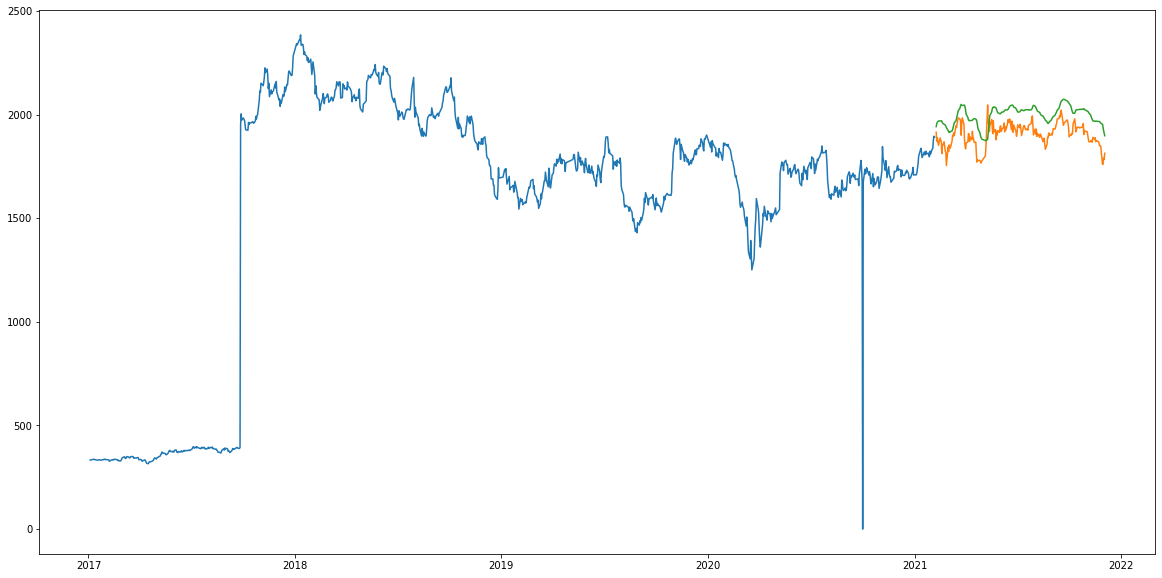

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

train = new_data[:1000]
valid = new_data[1000:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])

plt.plot(valid[['Close','Predictions']])

In [68]:
valid

,Close,Predictions
Date,,
2021-02-08,1915.0,1942.231689
2021-02-09,1872.0,1955.949585
2021-02-10,1888.0,1963.821655
2021-02-12,1852.0,1969.618530
2021-02-15,1888.0,1969.474609
...,...,...
2021-11-29,1760.0,1954.314575
2021-11-30,1761.0,1940.317749
2021-12-01,1790.0,1923.226074


In [69]:
import plotly.express as px

fig = px.line(trainStockPrices.loc[trainStockPrices['SecuritiesCode'] == 3946],
              x = "Date" , 
              y = ["Open" , "High" , "Low" , "Close"])
fig.show()

In [70]:
import plotly.express as px

fig = px.line(trainStockPrices.loc[trainStockPrices['SecuritiesCode'] == 3946],
              x = "Date" , 
              y = ["Target"])
fig.show()

In [71]:
trainOptions = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/train_files/options.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning:

Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.



In [72]:
trainOptions.T

,0,1,2,3,4,5,6,7,8,9,...,3567684,3567685,3567686,3567687,3567688,3567689,3567690,3567691,3567692,3567693
DateCode,20170104_132010018,20170104_132010118,20170104_132010218,20170104_132010318,20170104_132010518,20170104_132010618,20170104_132010718,20170104_132010818,20170104_132011018,20170104_132011118,...,20211203_199183018,20211203_199184018,20211203_199185018,20211203_199241018,20211203_199243018,20211203_199244018,20211203_199245018,20211203_199246018,20211203_199247018,20211203_199248018
Date,2017-01-04,2017-01-04,2017-01-04,2017-01-04,2017-01-04,2017-01-04,2017-01-04,2017-01-04,2017-01-04,2017-01-04,...,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03
OptionsCode,132010018,132010118,132010218,132010318,132010518,132010618,132010718,132010818,132011018,132011118,...,199183018,199184018,199185018,199241018,199243018,199244018,199245018,199246018,199247018,199248018
WholeDayOpen,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WholeDayHigh,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WholeDayLow,480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WholeDayClose,480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NightSessionOpen,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NightSessionHigh,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NightSessionLow,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [73]:
trainOptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567694 entries, 0 to 3567693
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DateCode             object 
 1   Date                 object 
 2   OptionsCode          int64  
 3   WholeDayOpen         float64
 4   WholeDayHigh         float64
 5   WholeDayLow          float64
 6   WholeDayClose        float64
 7   NightSessionOpen     object 
 8   NightSessionHigh     object 
 9   NightSessionLow      object 
 10  NightSessionClose    object 
 11  DaySessionOpen       float64
 12  DaySessionHigh       float64
 13  DaySessionLow        float64
 14  DaySessionClose      float64
 15  TradingVolume        int64  
 16  OpenInterest         int64  
 17  TradingValue         int64  
 18  ContractMonth        int64  
 19  StrikePrice          float64
 20  WholeDayVolume       int64  
 21  Putcall              int64  
 22  LastTradingDay       int64  
 23  SpecialQuotationDay  int64  
 24

In [74]:
trainTrades = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/train_files/trades.csv')

In [75]:
trainTrades.T

,0,1,2,3,4,5,6,7,8,9,...,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711
Date,2017-01-04,2017-01-05,2017-01-06,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-13,2017-01-13,2017-01-16,...,2021-11-26,2021-11-26,2021-11-26,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-02,2021-12-02,2021-12-03
StartDate,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-04,2017-01-04,2017-01-04,NaN,...,2021-11-15,2021-11-15,2021-11-15,NaN,NaN,NaN,2021-11-22,2021-11-22,2021-11-22,NaN
EndDate,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-06,2017-01-06,2017-01-06,NaN,...,2021-11-19,2021-11-19,2021-11-19,NaN,NaN,NaN,2021-11-26,2021-11-26,2021-11-26,NaN
Section,NaN,NaN,NaN,NaN,NaN,NaN,Growth Market (Mothers/JASDAQ),Prime Market (First Section),Standard Market (Second Section),NaN,...,Growth Market (Mothers/JASDAQ),Prime Market (First Section),Standard Market (Second Section),NaN,NaN,NaN,Growth Market (Mothers/JASDAQ),Prime Market (First Section),Standard Market (Second Section),NaN
TotalSales,NaN,NaN,NaN,NaN,NaN,NaN,459207445.0,8476800009.0,222354859.0,NaN,...,1501285351.0,15466049751.0,152404332.0,NaN,NaN,NaN,1143466211.0,11383425869.0,106996857.0,NaN
TotalPurchases,NaN,NaN,NaN,NaN,NaN,NaN,459326307.0,8483346362.0,221770706.0,NaN,...,1504055293.0,15456909679.0,152941327.0,NaN,NaN,NaN,1143922888.0,11376211690.0,107503559.0,NaN
TotalTotal,NaN,NaN,NaN,NaN,NaN,NaN,918533752.0,16960146371.0,444125565.0,NaN,...,3005340644.0,30922959430.0,305345659.0,NaN,NaN,NaN,2287389099.0,22759637559.0,214500416.0,NaN
TotalBalance,NaN,NaN,NaN,NaN,NaN,NaN,118862.0,6546353.0,-584153.0,NaN,...,2769942.0,-9140072.0,536995.0,NaN,NaN,NaN,456677.0,-7214179.0,506702.0,NaN
ProprietarySales,NaN,NaN,NaN,NaN,NaN,NaN,16057470.0,1311271004.0,13093607.0,NaN,...,60767884.0,1790465617.0,4172230.0,NaN,NaN,NaN,36639187.0,1499659823.0,2811025.0,NaN
ProprietaryPurchases,NaN,NaN,NaN,NaN,NaN,NaN,12822671.0,1453326508.0,6535935.0,NaN,...,55415941.0,1681088444.0,4049447.0,NaN,NaN,NaN,34960679.0,1230943712.0,3273163.0,NaN


In [76]:
trainFinnancials = pd.read_csv('../input/jpx-tokyo-stock-exchange-prediction/train_files/financials.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning:

Columns (14,15,16,17,18,19,42,44) have mixed types.Specify dtype option on import or set low_memory=False.



In [77]:
trainFinnancials.T

,0,1,2,3,4,5,6,7,8,9,...,92946,92947,92948,92949,92950,92951,92952,92953,92954,92955
DisclosureNumber,20161207453651.0,20170104467704.0,20161229465838.0,20170104467878.0,20170105468518.0,20161229465758.0,20170104467987.0,20170105468345.0,20170105468665.0,20170104467814.0,...,20211203446219.0,20211201445091.0,20211202445565.0,20211130444191.0,20211130443405.0,20211121439069.0,20211202446017.0,20211203446131.0,20211116436794.0,20211203446277.0
DateCode,20170104_2753,20170104_3353,20170104_4575,20170105_2659,20170105_3050,20170105_3139,20170105_3282,20170105_3344,20170105_4579,20170105_7453,...,20211203_3657,20211203_4026,20211203_4421,20211203_4699,20211203_4707,20211203_6040,20211203_6898,20211203_6969,20211203_8057,20211203_9627
Date,2017-01-04,2017-01-04,2017-01-04,2017-01-05,2017-01-05,2017-01-05,2017-01-05,2017-01-05,2017-01-05,2017-01-05,...,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03
SecuritiesCode,2753.0,3353.0,4575.0,2659.0,3050.0,3139.0,3282.0,3344.0,4579.0,7453.0,...,3657.0,4026.0,4421.0,4699.0,4707.0,6040.0,6898.0,6969.0,8057.0,9627.0
DisclosedDate,2017-01-04,2017-01-04,2017-01-04,2017-01-05,2017-01-05,2017-01-05,2017-01-05,2017-01-05,2017-01-05,2017-01-05,...,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03,2021-12-03
DisclosedTime,07:30:00,15:00:00,12:00:00,15:00:00,15:30:00,15:30:00,15:30:00,15:00:00,18:30:00,15:00:00,...,15:30:00,11:30:00,15:00:00,17:00:00,15:00:00,15:00:00,16:00:00,15:00:00,17:00:00,15:30:00
DisclosedUnixTime,1483482600.0,1483509600.0,1483498800.0,1483596000.0,1483597800.0,1483597800.0,1483597800.0,1483596000.0,1483608600.0,1483596000.0,...,1638513000.0,1638498600.0,1638511200.0,1638518400.0,1638511200.0,1638511200.0,1638514800.0,1638511200.0,1638518400.0,1638513000.0
TypeOfDocument,3QFinancialStatements_Consolidated_JP,3QFinancialStatements_Consolidated_JP,ForecastRevision,3QFinancialStatements_Consolidated_JP,ForecastRevision,ForecastRevision,ForecastRevision_REIT,3QFinancialStatements_Consolidated_JP,ForecastRevision,3QFinancialStatements_Consolidated_JP,...,3QFinancialStatements_Consolidated_JP,ForecastRevision,NumericalCorrection,1QFinancialStatements_Consolidated_JP,FYFinancialStatements_Consolidated_JP,1QFinancialStatements_Consolidated_JP,3QFinancialStatements_Consolidated_JP,ForecastRevision,1QFinancialStatements_Consolidated_JP,2QFinancialStatements_Consolidated_JP
CurrentPeriodEndDate,2016-12-31,2016-11-30,2016-12-31,2016-11-30,2017-02-28,2016-11-30,2017-01-31,2016-11-30,2016-12-31,2016-11-30,...,2021-10-31,2022-04-30,2021-09-30,2021-10-20,2021-10-20,2021-10-31,2021-10-31,2022-03-31,2021-10-20,2021-10-31
TypeOfCurrentPeriod,3Q,3Q,2Q,3Q,FY,FY,FY,3Q,FY,3Q,...,3Q,FY,FY,1Q,FY,1Q,3Q,FY,1Q,2Q


In [78]:
trainFinnancials['Date'] = pd.to_datetime(trainFinnancials['Date'])

In [79]:
trainFinnancials.Date.nunique()

1202

In [80]:
trainStockPrices.Date.nunique()

1202

In [81]:
trainTrades.Date.nunique()

1202

In [82]:
trainOptions.Date.nunique()

1202

In [83]:
trainFinnancials.SecuritiesCode.nunique()

4071

In [84]:
trainStockPrices.SecuritiesCode.nunique()

2000

In [85]:
trainFinnancials.groupby(['SecuritiesCode']).Date.count()

SecuritiesCode
1301.0    23
1332.0    24
1333.0    21
1352.0    25
1375.0     5
          ..
9993.0    31
9994.0    25
9995.0    30
9996.0    22
9997.0    26
Name: Date, Length: 4071, dtype: int64

In [86]:
trainStockPrices.groupby(['SecuritiesCode']).Date.count()

SecuritiesCode
1301    1202
1332    1202
1333    1202
1375     297
1376    1202
        ... 
9990    1202
9991    1202
9993    1202
9994    1202
9997    1202
Name: Date, Length: 2000, dtype: int64

In [87]:
trainFinnancials.isna().sum()

DisclosureNumber                                                                    2
DateCode                                                                            2
Date                                                                                0
SecuritiesCode                                                                      2
DisclosedDate                                                                       2
DisclosedTime                                                                       2
DisclosedUnixTime                                                                   2
TypeOfDocument                                                                      2
CurrentPeriodEndDate                                                                2
TypeOfCurrentPeriod                                                                 2
CurrentFiscalYearStartDate                                                          2
CurrentFiscalYearEndDate                              

In [88]:
trainFinnancials.loc[trainFinnancials.ForecastEarningsPerShare.isna() == True]

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
4,2.017011e+13,20170105_3050,2017-01-05,3050.0,2017-01-05,15:30:00,1.483598e+09,ForecastRevision,2017-02-28,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2.017010e+13,20170106_1401,2017-01-06,1401.0,2017-01-06,16:00:00,1.483686e+09,ForecastRevision,2017-05-31,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2.016123e+13,20170106_6312,2017-01-06,6312.0,2017-01-06,15:30:00,1.483684e+09,ForecastRevision,2017-02-28,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2.017011e+13,20170106_7520,2017-01-06,7520.0,2017-01-06,15:00:00,1.483682e+09,ForecastRevision,2017-02-28,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,2.016123e+13,20170106_9793,2017-01-06,9793.0,2017-01-06,15:00:00,1.483682e+09,ForecastRevision,2017-02-28,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92905,2.021113e+13,20211126_3393,2021-11-26,3393.0,2021-11-26,15:00:00,1.637906e+09,ForecastRevision,2022-03-31,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92917,2.021113e+13,20211129_6551,2021-11-29,6551.0,2021-11-29,15:00:00,1.638166e+09,NumericalCorrection,2021-09-30,FY,...,NaN,NaN,True,False,False,False,False,8561584.0,83643,8009628.0
92920,2.021113e+13,20211130_3439,2021-11-30,3439.0,2021-11-30,15:10:00,1.638253e+09,ForecastRevision,2022-06-30,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92931,2.021113e+13,20211130_8806,2021-11-30,8806.0,2021-11-30,18:15:00,1.638264e+09,ForecastRevision,2022-03-31,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
trainFinnancials.loc[trainFinnancials.ForecastEarningsPerShare.isna() == True , 'TypeOfDocument'].unique()

array(['ForecastRevision', '2QFinancialStatements_NonConsolidated_JP',
       '1QFinancialStatements_Consolidated_IFRS',
       'FYFinancialStatements_REIT',
       '3QFinancialStatements_Consolidated_JP',
       '3QFinancialStatements_NonConsolidated_JP',
       'FYFinancialStatements_Consolidated_JP',
       'FYFinancialStatements_Consolidated_IFRS',
       '3QFinancialStatements_Consolidated_US',
       '1QFinancialStatements_NonConsolidated_JP', 'NumericalCorrection',
       '3QFinancialStatements_Consolidated_IFRS',
       '2QFinancialStatements_Consolidated_JP',
       '1QFinancialStatements_Consolidated_JP',
       'OtherPeriodFinancialStatements_Consolidated_JP',
       'FYFinancialStatements_NonConsolidated_JP',
       '2QFinancialStatements_Consolidated_IFRS',
       'FYFinancialStatements_Consolidated_US',
       'OtherPeriodFinancialStatements_NonConsolidated_JP',
       'ForecastRevision_REIT', '1QFinancialStatements_Consolidated_US',
       '2QFinancialStatements_REIT',
 

In [90]:
trainFinnancials.loc[trainFinnancials.ForecastEarningsPerShare.isna() == False , 'TypeOfDocument'].unique()

array(['3QFinancialStatements_Consolidated_JP', 'ForecastRevision',
       'ForecastRevision_REIT',
       '3QFinancialStatements_NonConsolidated_JP',
       '2QFinancialStatements_Consolidated_JP',
       '1QFinancialStatements_NonConsolidated_JP',
       '2QFinancialStatements_NonConsolidated_JP',
       '1QFinancialStatements_Consolidated_JP',
       'FYFinancialStatements_Consolidated_JP',
       'FYFinancialStatements_NonConsolidated_JP',
       '3QFinancialStatements_Consolidated_IFRS',
       'FYFinancialStatements_Consolidated_IFRS',
       '1QFinancialStatements_Consolidated_IFRS', 'NumericalCorrection',
       '3QFinancialStatements_Consolidated_US',
       'FYFinancialStatements_Consolidated_US',
       '2QFinancialStatements_Consolidated_IFRS',
       '1QFinancialStatements_Consolidated_US',
       '2QFinancialStatements_Consolidated_US',
       '2QFinancialStatements_NonConsolidated_IFRS'], dtype=object)

In [91]:
trainFinnancials.loc[trainFinnancials.ForecastEarningsPerShare.isna() == True].T

,4,18,29,30,44,158,220,277,303,331,...,92881,92893,92894,92898,92903,92905,92917,92920,92931,92932
DisclosureNumber,20170105468518.0,20170104467731.0,20161228465070.0,20170106469052.0,20161226463380.0,20161226463770.0,20170112472248.0,20170112472211.0,20170112472340.0,20170111471618.0,...,20211117437768.0,20211117437633.0,20211122439138.0,20211125441052.0,20211126441927.0,20211126441865.0,20211129442916.0,20211129442935.0,20211130444201.0,20211130444212.0
DateCode,20170105_3050,20170106_1401,20170106_6312,20170106_7520,20170106_9793,20170111_8887,20170112_7818,20170113_3094,20170113_3760,20170113_6186,...,20211118_8961,20211122_8101,20211122_8804,20211125_3266,20211126_1930,20211126_3393,20211129_6551,20211130_3439,20211130_8806,20211130_9358
Date,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-06 00:00:00,2017-01-06 00:00:00,2017-01-06 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-13 00:00:00,2017-01-13 00:00:00,...,2021-11-18 00:00:00,2021-11-22 00:00:00,2021-11-22 00:00:00,2021-11-25 00:00:00,2021-11-26 00:00:00,2021-11-26 00:00:00,2021-11-29 00:00:00,2021-11-30 00:00:00,2021-11-30 00:00:00,2021-11-30 00:00:00
SecuritiesCode,3050.0,1401.0,6312.0,7520.0,9793.0,8887.0,7818.0,3094.0,3760.0,6186.0,...,8961.0,8101.0,8804.0,3266.0,1930.0,3393.0,6551.0,3439.0,8806.0,9358.0
DisclosedDate,2017-01-05,2017-01-06,2017-01-06,2017-01-06,2017-01-06,2017-01-11,2017-01-12,2017-01-13,2017-01-13,2017-01-13,...,2021-11-18,2021-11-22,2021-11-22,2021-11-25,2021-11-26,2021-11-26,2021-11-29,2021-11-30,2021-11-30,2021-11-30
DisclosedTime,15:30:00,16:00:00,15:30:00,15:00:00,15:00:00,15:00:00,12:00:00,12:00:00,15:00:00,15:00:00,...,15:30:00,15:00:00,15:00:00,15:30:00,15:00:00,15:00:00,15:00:00,15:10:00,18:15:00,18:15:00
DisclosedUnixTime,1483597800.0,1483686000.0,1483684200.0,1483682400.0,1483682400.0,1484114400.0,1484190000.0,1484276400.0,1484287200.0,1484287200.0,...,1637217000.0,1637560800.0,1637560800.0,1637821800.0,1637906400.0,1637906400.0,1638165600.0,1638252600.0,1638263700.0,1638263700.0
TypeOfDocument,ForecastRevision,ForecastRevision,ForecastRevision,ForecastRevision,ForecastRevision,ForecastRevision,ForecastRevision,ForecastRevision,2QFinancialStatements_NonConsolidated_JP,ForecastRevision,...,FYFinancialStatements_REIT,ForecastRevision,NumericalCorrection,ForecastRevision,ForecastRevision,ForecastRevision,NumericalCorrection,ForecastRevision,ForecastRevision,ForecastRevision
CurrentPeriodEndDate,2017-02-28,2017-05-31,2017-02-28,2017-02-28,2017-02-28,2017-05-31,2017-08-31,2017-02-28,2016-11-30,2017-03-31,...,2021-09-30,2022-03-31,2021-09-30,2021-11-30,2022-03-31,2022-03-31,2021-09-30,2022-06-30,2022-03-31,2021-06-30
TypeOfCurrentPeriod,FY,FY,FY,FY,FY,FY,FY,FY,2Q,FY,...,FY,FY,3Q,FY,FY,FY,FY,FY,FY,1Q


In [92]:
trainFinnancials.loc[trainFinnancials.EarningsPerShare.isna() == True , 'TypeOfDocument'].unique()

array(['ForecastRevision', 'ForecastRevision_REIT',
       'FYFinancialStatements_REIT', 'NumericalCorrection',
       'OtherPeriodFinancialStatements_Consolidated_JP',
       'FYFinancialStatements_Consolidated_JP',
       'OtherPeriodFinancialStatements_NonConsolidated_JP', nan,
       '2QFinancialStatements_REIT',
       '2QFinancialStatements_Consolidated_JP',
       'FYFinancialStatements_NonConsolidated_JP',
       'FYFinancialStatements_NonConsolidated_IFRS',
       '1QFinancialStatements_NonConsolidated_IFRS',
       '2QFinancialStatements_NonConsolidated_IFRS',
       '3QFinancialStatements_NonConsolidated_IFRS'], dtype=object)